In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import seaborn as sns
import matplotlib.animation as animation
import matplotlib.colors as mcolors
# from mpl_toolkits.basemap import Basemap

%matplotlib inline

### Corona Virus Analysis

### Which Country had the most confirmed cases?

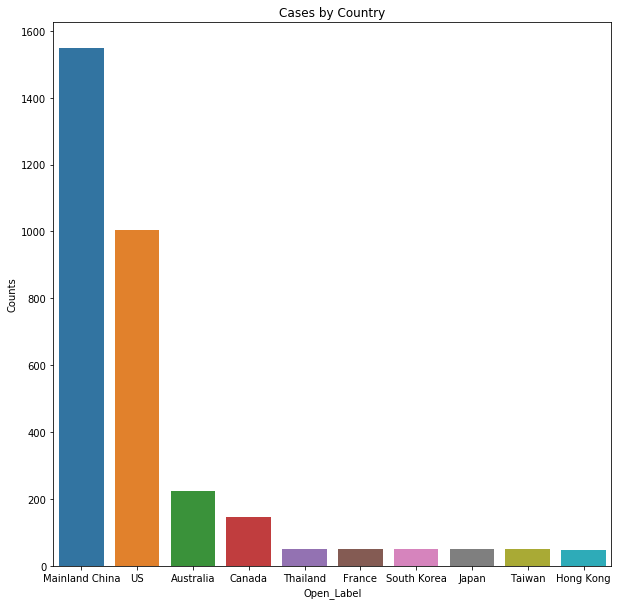

In [2]:
df_1=pd.read_csv('covid_19_data.csv')
x=list(df_1["Country/Region"].value_counts().to_dict().keys())[:10]
y=list(df_1["Country/Region"].value_counts().to_dict().values())[:10]
ax=sns.barplot(x=x,y=y)
ax.set_xlabel("Open_Label")
ax.set_ylabel("Counts")
ax.set_title("Cases by Country")
fig=plt.gcf()
fig.set_figheight(10)
fig.set_figwidth(10)

## So China-Clearly, so lets study china in more detail?

Text(0.5,1,'Cases in China Provinces')

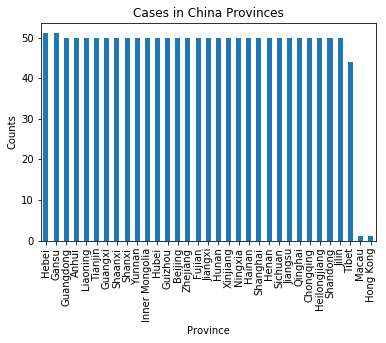

In [3]:
df_1[(df_1['Country/Region']=='Mainland China')]["Province/State"].value_counts().plot(kind="bar")
ax=plt.gca()
ax.set_xlabel("Province")
ax.set_ylabel("Counts")
ax.set_title("Cases in China Provinces")

In [4]:
df_2=pd.read_csv("COVID19_line_list_data.csv")

Text(0.5,1,'Cases in China by Age')

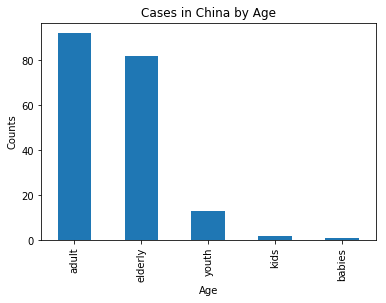

In [5]:
pd.cut(df_2[(df_2['country']=='China')]["age"].astype("float32"), bins=[0.25, 2, 10, 25,50,100],include_lowest=True,labels=["babies","kids","youth","adult","elderly"]).value_counts().plot(kind="bar")
ax=plt.gca()
ax.set_xlabel("Age")
ax.set_ylabel("Counts")
ax.set_title("Cases in China by Age")

Text(0.5,1,'Cases in China by Gender')

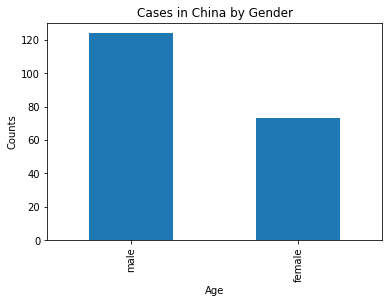

In [6]:
df_2[(df_2["country"]=="China")]["gender"].value_counts().plot(kind="bar")
ax=plt.gca()
ax.set_xlabel("Age")
ax.set_ylabel("Counts")
ax.set_title("Cases in China by Gender")

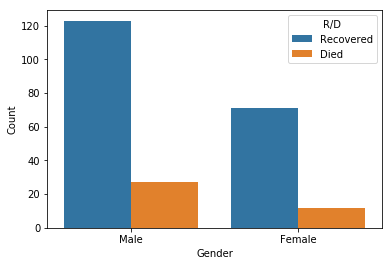

In [7]:
males_number_died=df_2[(df_2['country']=='China') & (df_2['gender']=='male') & (df_2['death']=='1')]["death"].value_counts()[0]
males_number_recovered=df_2[(df_2['country']=='China') & (df_2['gender']=='male') & (df_2['recovered']=='0')]["recovered"].value_counts()[0]
females_number_died=df_2[(df_2['country']=='China') & (df_2['gender']=='female') & (df_2['death']=='1')]["death"].value_counts()[0]
females_number_recovered=df_2[(df_2['country']=='China') & (df_2['gender']=='female')& (df_2['recovered']=='0') ]["recovered"].value_counts()[0]
df_temp=pd.DataFrame(np.array([[int(males_number_recovered),"Male","Recovered"],[int(females_number_recovered),"Female","Recovered"],
                      [int(males_number_died),"Male","Died"],[int(females_number_died),"Female","Died"]]),columns=["Count","Gender","R/D"])
df_temp["Count"]=df_temp["Count"].astype("float32")
ax = sns.barplot(x="Gender", y="Count", hue="R/D", data=df_temp)


In [8]:
df_2["age_category"]=pd.cut(df_2[(df_2['country']=='China')]["age"].astype("float32"), bins=[0.25, 2, 10, 25,50,100],include_lowest=True,labels=["babies","kids","youth","adult","elderly"])

In [9]:
babies_death=0
kids_death=0
youth_dead=0
adult_dead=df_2[(df_2['country']=='China') & (df_2['age_category']=='adult')& (df_2['death']=='1') ]["death"].value_counts()[0]
elderly_dead=df_2[(df_2['country']=='China') & (df_2['age_category']=='elderly')& (df_2['death']=='1') ]["death"].value_counts()[0]

In [10]:
babies_recovered=0
kids_recovered=0
youth_recovered=0
adult_recovered=df_2[(df_2['country']=='China') & (df_2['age_category']=='adult')& (df_2['recovered']=='1') ]["recovered"].value_counts()[0]
elderly_recovered=df_2[(df_2['country']=='China') & (df_2['age_category']=='elderly')& (df_2['recovered']=='1') ]["recovered"].value_counts()[0]

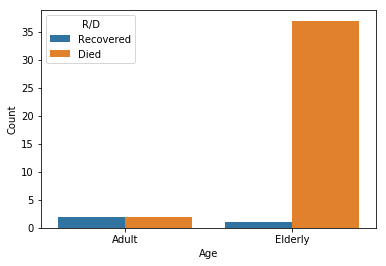

In [11]:
df_temp=pd.DataFrame(np.array([[int(adult_recovered),"Adult","Recovered"],[int(elderly_recovered),"Elderly","Recovered"],
                      [int(adult_dead),"Adult","Died"],[int(elderly_dead),"Elderly","Died"]]),columns=["Count","Age","R/D"])
df_temp["Count"]=df_temp["Count"].astype("float32")
ax = sns.barplot(x="Age", y="Count", hue="R/D", data=df_temp)

### Lets Study the Symptoms in More Details

In [12]:
symtoms_text=df_2["symptom"].dropna().tolist()
all_voc_symtoms=[]
for sentence in symtoms_text:
    allWords = nltk.tokenize.word_tokenize(sentence)
    for word in allWords:
        if word!=',':
            all_voc_symtoms.append(word)
allWordDist = nltk.FreqDist(w.lower() for w in all_voc_symtoms)
allWordDist={k: v for k, v in sorted(allWordDist.items(), key=lambda item: item[1],reverse=True)}

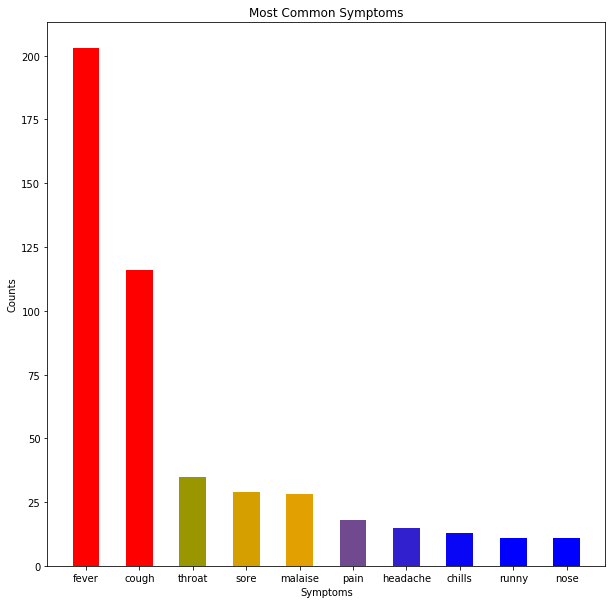

In [15]:
clist = [(0, "blue"), (0.125, "blue"), (0.25, "orange"), (0.5, "green"), 
         (0.7, "green"), (0.75, "red"), (1, "red")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
bar=plt.bar(range(len(list(allWordDist.values())[:10])), list(allWordDist.values())[:10], width=0.5,color=rvb(np.array(list((allWordDist.values()))[:10])/100),align='center')
plt.xticks(range(len(list(allWordDist.values())[:10])), list(allWordDist.keys())[:10])

fig=plt.gcf()
ax=plt.gca()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_ylabel("Counts")
ax.set_xlabel("Symptoms")
ax.set_title("Most Common Symptoms")
plt.show()

## TimeSeries Analysis-Deaths Worldwide

In [16]:
df_3=pd.read_csv("time_series_covid_19_deaths.csv")

In [17]:
df_3.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,NaN
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,8,8,8,8,8,8,8,8,8,NaN
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,NaN
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,NaN
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,0.0


In [18]:
##only including those countries which has sum of deaths greater than zero
df_temp=df_3.drop(["Lat","Long"],1).groupby("Country/Region").sum()
df_temp["cummulative_sum"]=df_temp.sum(axis=1)
country_list=df_temp.index.tolist()
s=0
for value in df_temp["cummulative_sum"]:
    if value==0:
        df_temp.drop(country_list[s],inplace=True)
    s+=1
df_temp.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,cummulative_sum
Country/Region,,,,,,,,,,,,,,,,,,,,,
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1.0
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1.0,4.0
Australia,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,3,3,3,3.0,23.0
Belgium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.0,3.0
Bulgaria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1.0


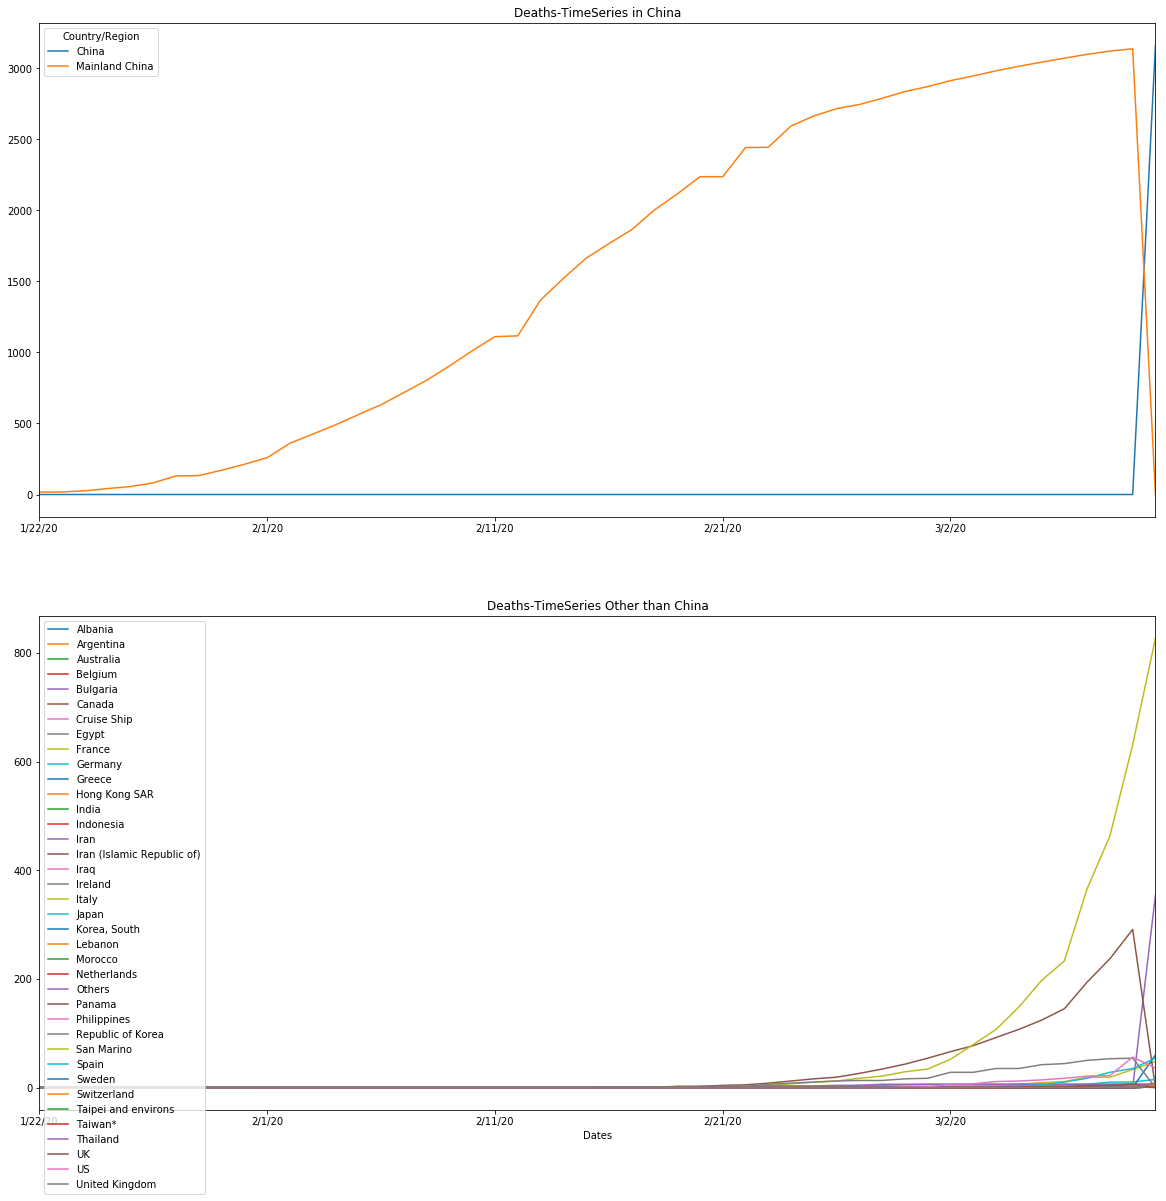

In [19]:
fig=plt.figure()
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)##Next-Task-1-------Hovering Interactive
df_temp.loc[["China","Mainland China"],:].drop("cummulative_sum",1).T.plot(ax=ax1)
df_temp.drop(["China","Mainland China"]).drop("cummulative_sum",1).T.plot(ax=ax2)
ax1.set_title("Deaths-TimeSeries in China")
ax2.set_title("Deaths-TimeSeries Other than China")
ax2.set_xlabel("Dates")
fig.set_figheight(20)
fig.set_figwidth(20)
plt.legend(loc=2)

The Mean Death WorldWide is 2183.575


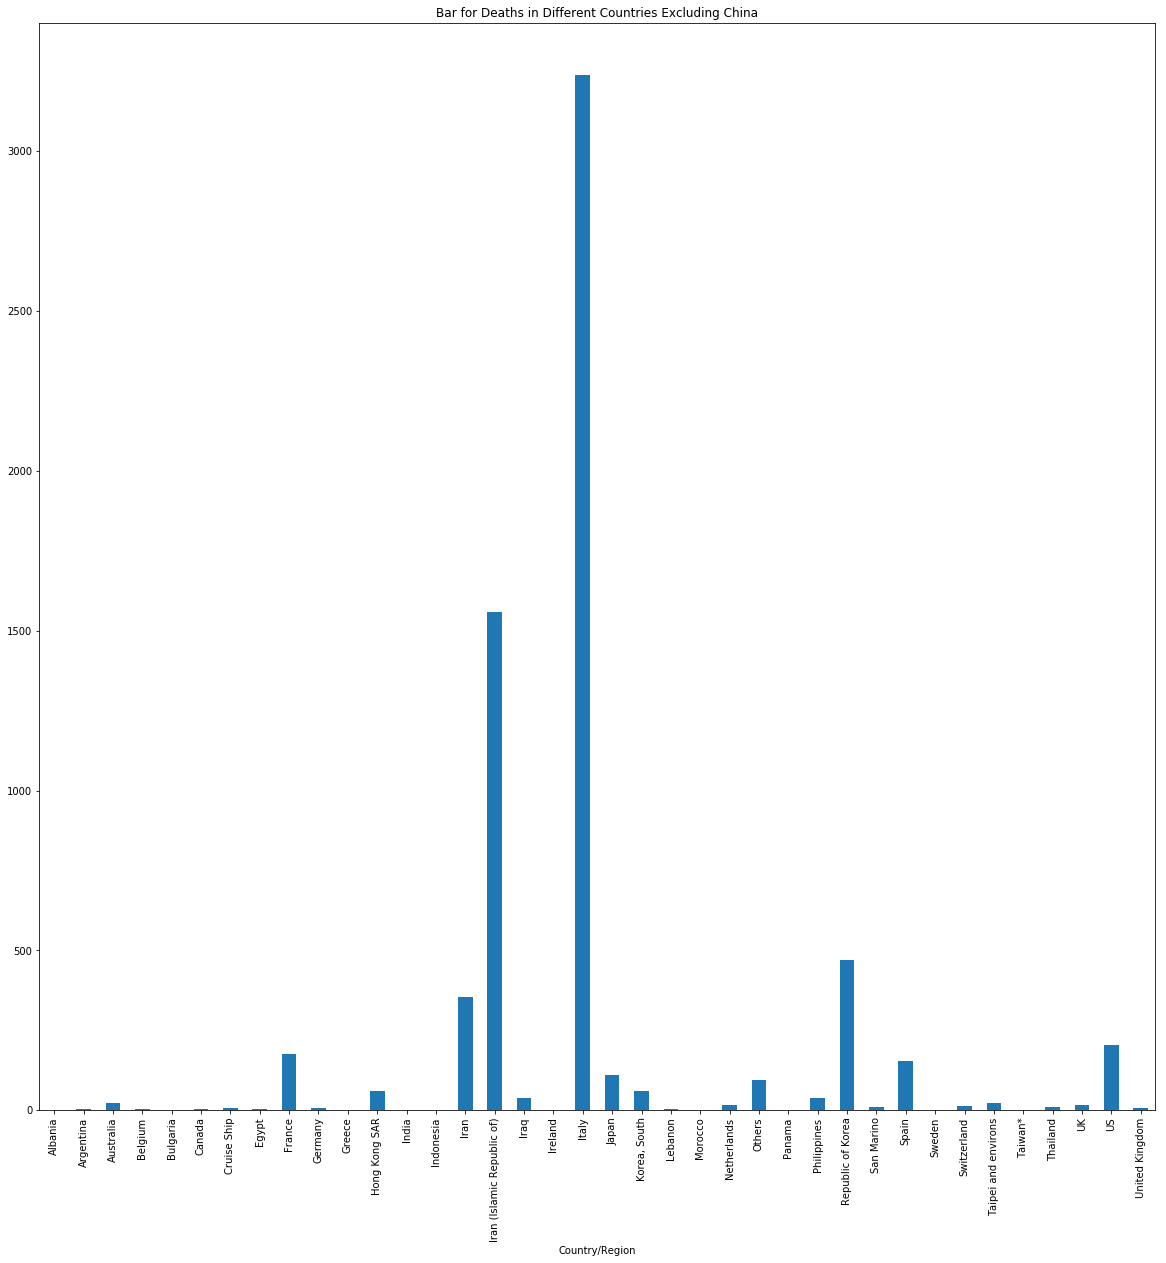

In [20]:
df_temp["cummulative_sum"].drop(["Mainland China","China"]).plot(kind='bar')
fig=plt.gcf()
ax=plt.gca()
ax.set_title("Bar for Deaths in Different Countries Excluding China")
fig.set_figheight(20)
fig.set_figwidth(20)
print("The Mean Death WorldWide is {}".format((df_temp["cummulative_sum"].mean())))

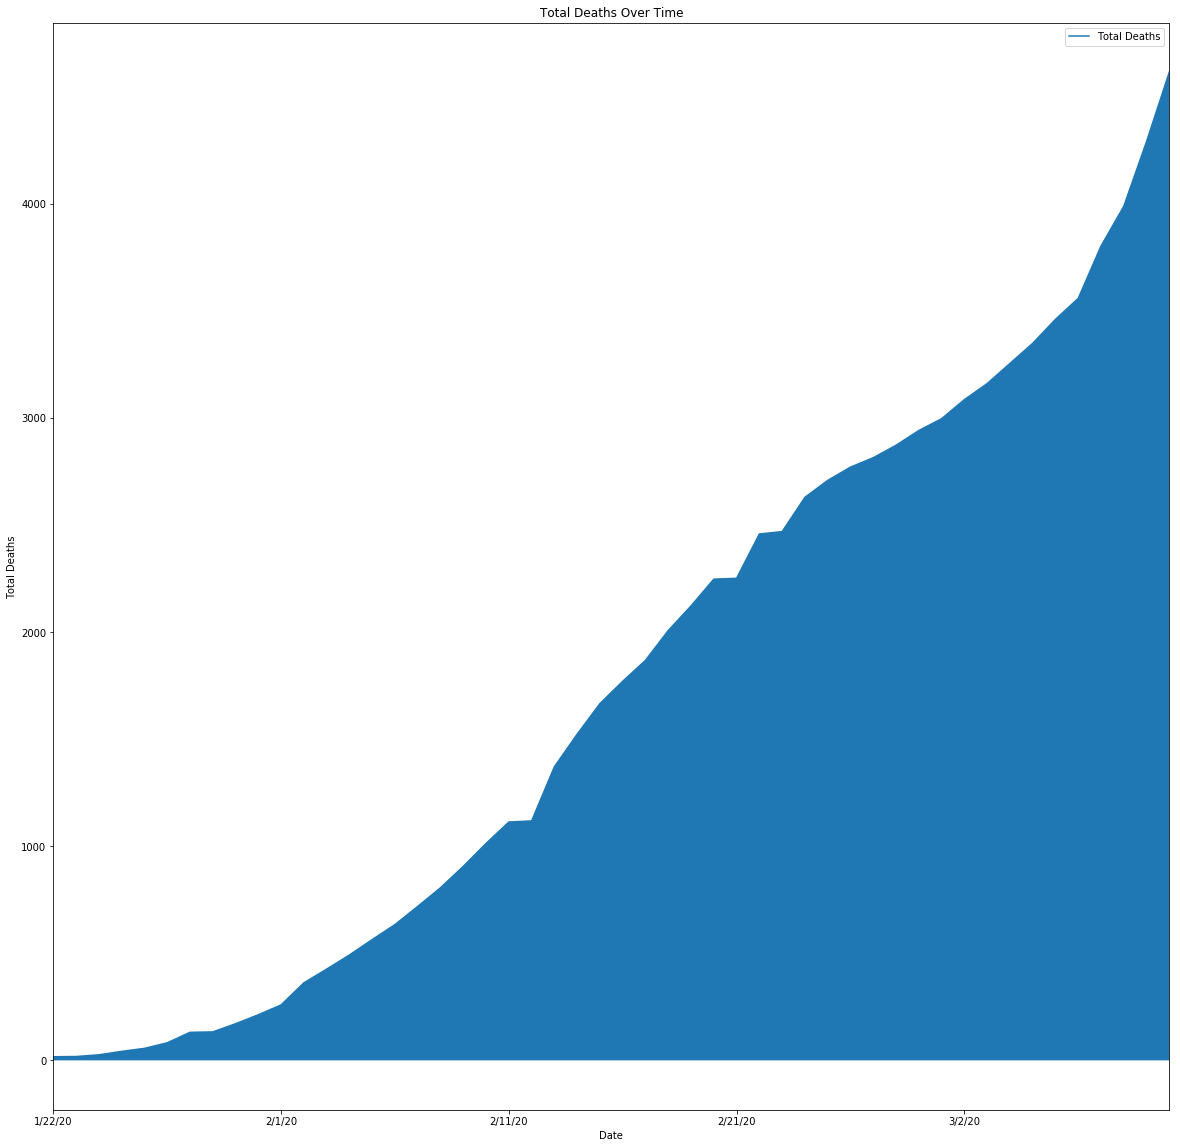

In [21]:
df_temp.drop("cummulative_sum",1).sum(axis=0).plot(label="Total Deaths")
fig=plt.gcf()
ax=plt.gca()
fig.set_figheight(20)
fig.set_figwidth(20)
ax.set_xlabel("Date")
ax.set_ylabel("Total Deaths")
ax.set_title("Total Deaths Over Time")
ax.fill_between(df_temp.columns.tolist()[:-1],df_temp.drop("cummulative_sum",1).sum(axis=0).tolist())
plt.legend()

<h1>Interactive Plot Show-Casing Deaths in MainLand China Vs Rest of World Over time</h1>

<IPython.core.display.Javascript object>


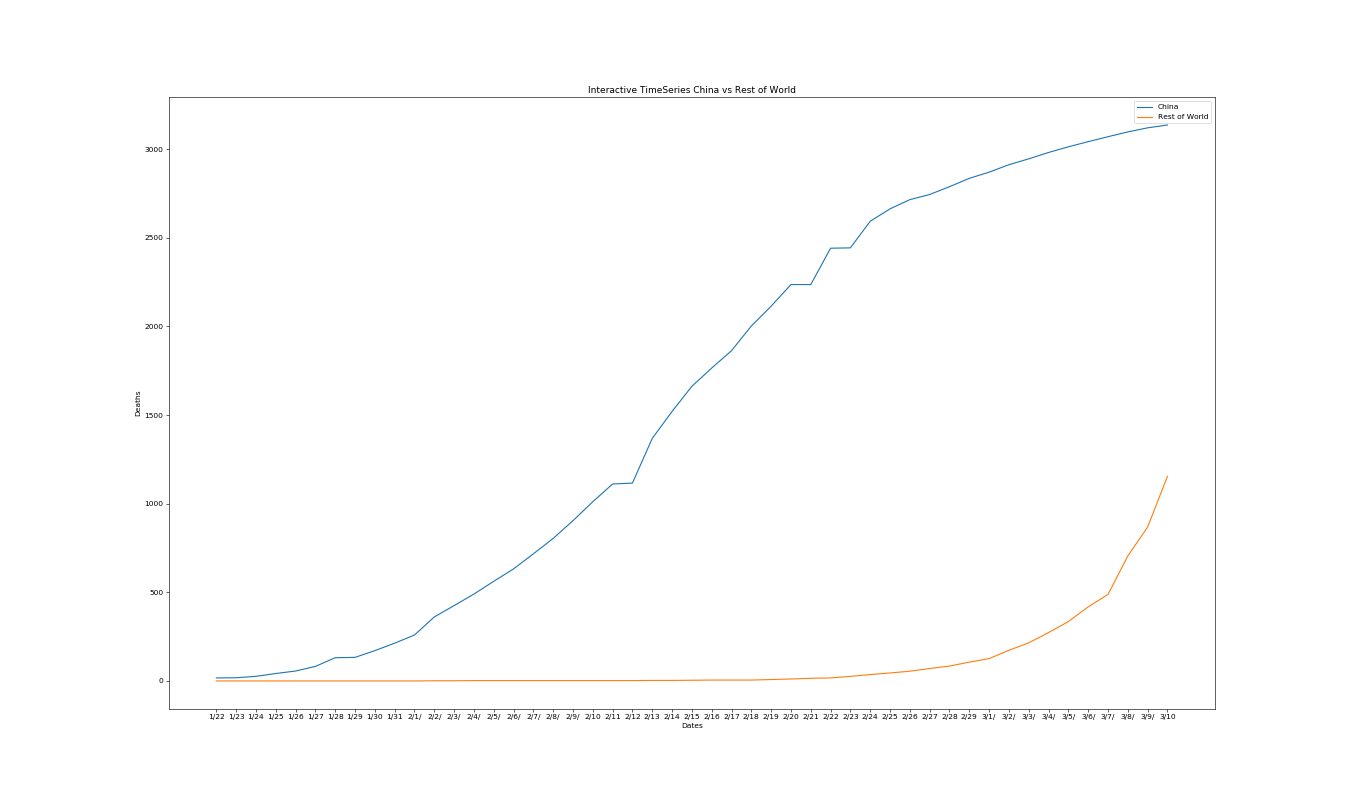

In [38]:
deaths_main_china=df_temp.loc["Mainland China",:"3/10/20"].tolist()
deaths_world_wide=df_temp.drop(["Mainland China","China"],0).drop(["cummulative_sum"],1).sum(axis=0).tolist()
dates=[date[:4] for date in df_temp.loc["Mainland China",:"3/10/20"].index.tolist()]
dates_worldwide=[date[:4] for date in df_temp.drop(["Mainland China","China"],0).drop(["cummulative_sum"],1).sum(axis=0).index.tolist()]
n=len(deaths_main_china)

%matplotlib notebook
def update(curr):
    if curr==n:
        a.event_source.stop()
    plt.cla()
    plt.plot(dates[:curr],deaths_main_china[:curr],label="China")
    plt.plot(dates_worldwide[:curr],deaths_world_wide[:curr],label="Rest of World")
    plt.gca().set_title("Interactive TimeSeries China vs Rest of World")
    plt.gca().set_xlabel("Dates")
    plt.gca().set_ylabel("Deaths")
    plt.legend()
    
fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(25)
a=animation.FuncAnimation(fig,update,interval=1)

### World Map Representation of Deaths

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,9))
lat = df_3['Lat'].values
long = df_3['Long'].values
# determine range to print based on min, max lat and long of the data
margin = .2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
long_min = min(long) - margin
long_max = max(long) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=long_min,
            llcrnrlat=lat_min,
            urcrnrlon=long_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(long_max-long_min)/2,
            projection='mill',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and long to map projection coordinates
lons, lats = m(long, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r',zorder=2)
plt.title("Number of Deaths on WorldMap")
plt.show()

<img src='https://i.imgur.com/se855UU.png'>

### TimeSeries Analysis-Recovered Worldwide